In [2]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


from IPython.display import Image



from pylab import rcParams
from sklearn.preprocessing import scale
from collections import Counter


In [3]:
EOS_FAM = pd.read_csv('EOS.csv', delimiter=';')

In [5]:
EOS_FAM.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,221.0,Eos,NaN,EOS,S,K,S,NaN,103.87,M,...,NaN,0.05,0.12,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,320.0,Katharina,NaN,EOS,A,S,C,NaN,24.57,M,...,NaN,0.19,0.21,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,339.0,Dorothea,1892 G,EOS,S,K,S,NaN,38.25,M,...,NaN,0.06,0.10,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,450.0,Brigitta,1899 EV,EOS,T,CSU,D,NaN,33.46,M,...,NaN,0.22,0.31,3.0,NaN,NaN,NaN,Y,NaN,NaN
4,513.0,Centesima,1903 LY,EOS,S,K,S,NaN,50.15,M,...,NaN,0.18,0.45,3.0,NaN,NaN,NaN,Y,NaN,NaN


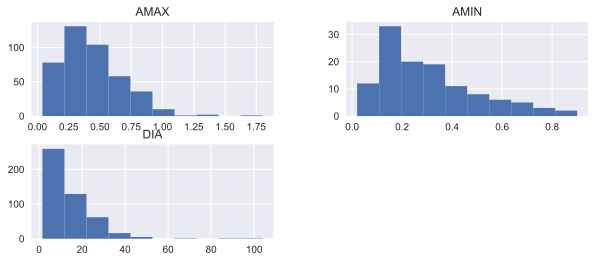

In [6]:
hist1 = ['DIA', 'AMIN', 'AMAX']
EOS_FAM[hist1].hist(figsize=(10, 4));

Un histograma agrupa los valores en intervalos de igual rango de valores. La forma del histograma puede contener pistas sobre el tipo de distribución subyacente: gaussiano, exponencial, etc. También puede detectar cualquier sesgo en su forma cuando la distribución es casi regular pero tiene algunas anomalías. Conocer la distribución de los valores de las funciones se vuelve importante cuando utiliza métodos de Aprendizaje Automático que asumen un tipo particular (en la mayoría de los casos, gaussiano).

También hay otra forma, a menudo más clara, de comprender la distribución: gráficos de densidad o, más formalmente, gráficos de densidad de kernel. Pueden considerarse una versión suavizada del histograma. Su principal ventaja sobre este último es que no dependen del tamaño de los contenedores. Vamos a crear gráficos de densidad para las mismas dos variables:

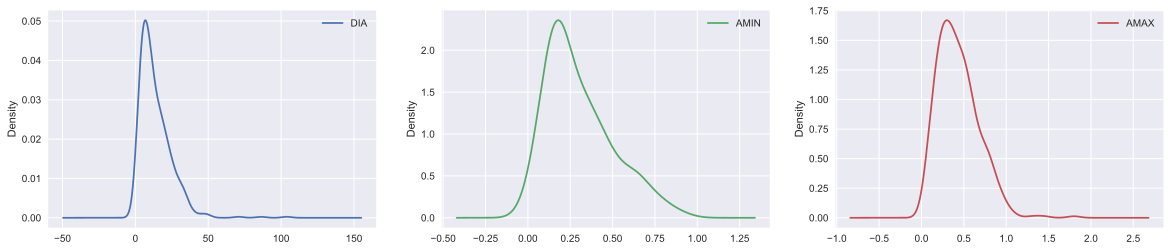

In [13]:
EOS_FAM[hist1].plot(kind='density', subplots=True, layout=(1, 3), 
                  sharex=False, figsize=(20,4)); 1

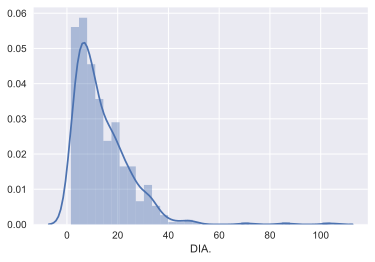

In [37]:
sns.distplot(EOS_FAM['DIA.']);
#sns.distplot(EOS_FAM['AMIN']);


In [6]:
from scipy.stats import maxwell

(0, 5.020334697642149)


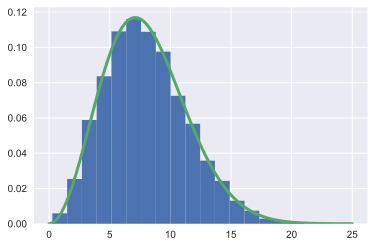

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

maxwell = stats.maxwell
data = maxwell.rvs(loc=0, scale=5, size=10000)

params = maxwell.fit(data, floc=0)
print(params)
# (0, 4.9808603062591041)

plt.hist(data, bins=20, normed=True)
x = np.linspace(0, 25, 100)
plt.plot(x, maxwell.pdf(x, *params), lw=3)
plt.show()

## BOX PLOT
Veamos cómo interpretar un diagrama de caja. Sus componentes son una caja (obviamente, esta es la razón por la que se llama una gráfica de caja), los llamados bigotes y una serie de puntos individuales (valores atípicos).

La caja por sí misma ilustra la extensión intercuartil de la distribución; su longitud está determinada por los percentiles 25 (Q1) y 75 (Q3). La línea vertical dentro de la caja marca la mediana (50%) de la distribución.

Los bigotes son las líneas que se extienden desde la caja. Representan la dispersión completa de los puntos de datos, específicamente los puntos que caen dentro del intervalo (Q1−1.5⋅IQR, Q3 + 1.5⋅IQR), donde IQR = Q3 − Q1 es el rango intercuartil.

Los valores atípicos que quedan fuera del rango delimitado por los bigotes se trazan individualmente como puntos negros a lo largo del eje central.



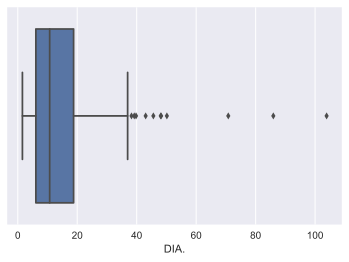

In [41]:
sns.boxplot(x='DIA.', data=EOS_FAM);


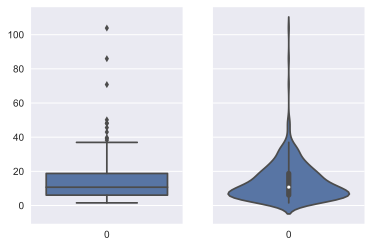

In [42]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=EOS_FAM['DIA.'], ax=axes[0]);
sns.violinplot(data=EOS_FAM['DIA.'], ax=axes[1]);

La diferencia entre las gráficas de caja y violín es que la primera ilustra ciertas estadísticas sobre ejemplos individuales en un conjunto de datos, mientras que la trama de violín se concentra más en la distribución suavizada en su conjunto.


In [44]:
EOS_FAM[hist1].describe()

,DIA.,AMIN,AMAX
count,474.00000,119.000000,421.000000
mean,13.82711,0.304286,0.432494
std,11.08659,0.195628,0.242774
min,1.56000,0.020000,0.040000
25%,6.08750,0.160000,0.250000
50%,10.73000,0.250000,0.400000
75%,18.77500,0.430000,0.570000
max,103.87000,0.900000,1.800000


## Matriz de correlación
Veamos las correlaciones entre las variables numéricas en nuestro conjunto de datos. Es importante saber esta información ya que hay algoritmos de aprendizaje automático (por ejemplo, regresión lineal y logística) que no manejan bien las variables de entrada altamente correlacionadas.

Primero, usaremos el método corr () en un DataFrame que calcula la correlación entre cada par de características. Luego, pasamos la matriz de correlación resultante a heatmap () de seaborn, que genera una matriz codificada por colores para los valores proporcionados:

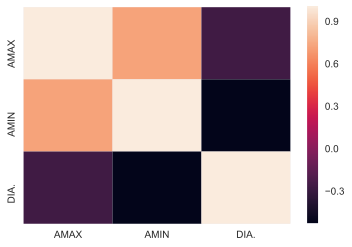

In [63]:
numerical = list(set(['DIA.', 'AMIN', 'AMAX']))
corr_matrix = EOS_FAM[numerical].corr()
sns.heatmap(corr_matrix);


Text(0,0.5,'Amplitud mínima')

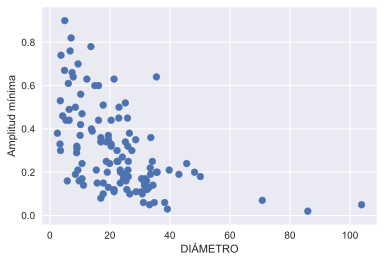

In [69]:
plt.scatter(EOS_FAM['DIA.'], EOS_FAM['AMIN']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Amplitud mínima', fontdict=None, labelpad=None)

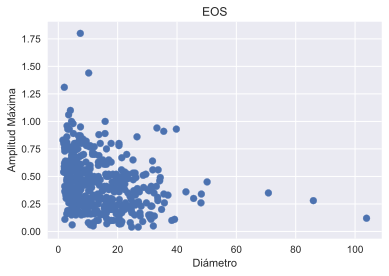

In [16]:
plt.scatter(EOS_FAM['DIA'], EOS_FAM['AMAX']);
plt.title("EOS")
plt.xlabel("Diámetro")
plt.ylabel("Amplitud Máxima")
plt.show()

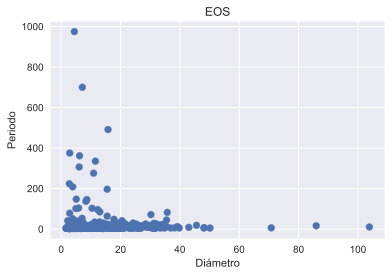

In [17]:
plt.scatter(EOS_FAM['DIA'], EOS_FAM['PERIOD']);
plt.title("EOS")
plt.xlabel("Diámetro")
plt.ylabel("Periodo")
plt.show()

In [56]:
EOS_FAM.corr()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,BIN
NUMBER,1.000000,NaN,-0.450672,0.718703,NaN,NaN,0.007458,0.030590,NaN,NaN,0.426694,0.291671,-0.229799,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIA.,-0.450672,NaN,1.000000,-0.876140,NaN,NaN,-0.006787,-0.073333,NaN,NaN,-0.531030,-0.272237,0.510865,NaN
H,0.718703,NaN,-0.876140,1.000000,NaN,NaN,-0.048893,0.078790,NaN,NaN,0.593059,0.331754,-0.501613,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALBEDO,0.007458,NaN,-0.006787,-0.048893,NaN,NaN,1.000000,0.002159,NaN,NaN,-0.136013,0.018812,0.078128,NaN
PERIOD,0.030590,NaN,-0.073333,0.078790,NaN,NaN,0.002159,1.000000,NaN,NaN,-0.027527,0.166590,-0.049893,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


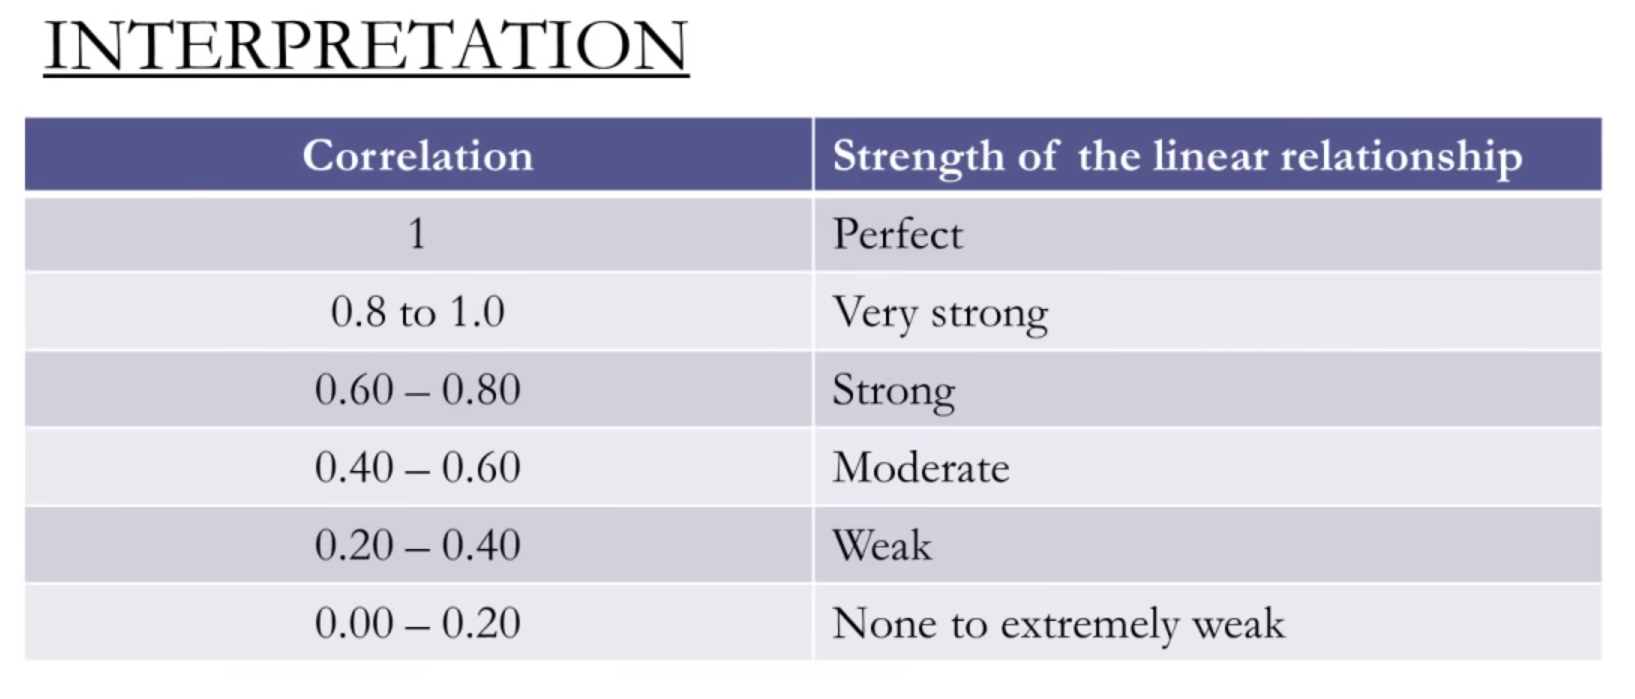

In [62]:
Image(filename='table.png')

In [ ]:
### SOLUTION TO THE ERROR
#sns.pairplot(EOS_FAM)
#EOS_FAM.replace([np.inf, -np.inf], np.nan)
#EOS_FAM.dropna(subset=['DIA.', 'AMIN'])
#EOS_FAM.head()


In [142]:
EOS_FAM.replace([np.inf, -np.inf], np.nan)
EOS_FAM.dropna(subset=['DIA', 'AMIN'])
new_EOS_FAM = EOS_FAM.drop('DIA',axis ='columns')
OLA = EOS_FAM.DIA
OLA

0      103.87
1       24.57
2       38.25
3       33.46
4       50.15
5       28.61
6       31.84
7       30.56
8       48.21
9       85.95
10      39.78
11      25.39
12      34.37
13      70.80
14      33.04
15      39.18
16      48.08
17      31.75
18      45.60
19      31.18
20      33.54
21      43.01
22      26.15
23      21.40
24      27.33
25      27.52
26      24.71
27      35.52
28      31.67
29      31.53
        ...  
444      3.39
445      2.29
446      2.90
447      2.88
448      2.50
449      2.66
450      2.21
451      3.72
452      2.01
453      2.95
454      2.24
455      2.30
456      3.09
457      2.21
458      2.15
459      2.09
460      2.08
461      2.53
462      2.69
463      2.03
464      1.82
465      2.40
466      2.24
467      2.17
468      2.06
469      2.05
470      1.78
471      1.56
472      2.24
473      2.82
Name: DIA, Length: 474, dtype: float64

In [ ]:
ola